In [1]:
from process import *

In [2]:
data_frame = process_data()

100%|██████████| 124/124 [00:29<00:00,  4.18it/s]


In [3]:
data_frame

,repository,label,owner,name,watchers,description,mentionableUsers,closed_pull_requests,closed_issues,open_issues,forks,merged_pull_requests,stargazers,open_pull_requests,projects,size,readme,LANGUAGE_Objective-C,LANGUAGE_Shell,LANGUAGE_C,isOwnerHomepage,hasHomepage,hasLicense,hasCiConfig,commitsCount,branchesCount,tagsCount,releasesCount,LANGUAGE_Python,LANGUAGE_JavaScript,LANGUAGE_HTML,LANGUAGE_Perl,LANGUAGE_CSS,LANGUAGE_Swift,LANGUAGE_TeX,LANGUAGE_Ruby,LANGUAGE_Makefile,LANGUAGE_Groovy,LANGUAGE_Java,LANGUAGE_FreeMarker,LANGUAGE_XSLT,LANGUAGE_SQLPL,LANGUAGE_Smarty,LANGUAGE_Batchfile,LANGUAGE_FORTRAN,LANGUAGE_Common Lisp,LANGUAGE_PostScript,LANGUAGE_APL,LANGUAGE_PHP,LANGUAGE_TypeScript,LANGUAGE_C++,LANGUAGE_CoffeeScript,LANGUAGE_Jupyter Notebook,LANGUAGE_Matlab,LANGUAGE_Go,LANGUAGE_R,LANGUAGE_Julia,LANGUAGE_Smalltalk
0,briantemple/homeworkr,DEV,briantemple,homeworkr,1.0,A simple rails app to handle homework assignme...,1.0,0.0,0.0,0.0,2.0,0.0,6.0,0.0,0.0,226.0,HomeworkrHomeworkr is a simple rails app to h...,NaN,NaN,NaN,False,True,True,False,30.0,2.0,0.0,0.0,NaN,0.114283,NaN,NaN,NaN,NaN,NaN,0.885717,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,spring-projects/spring-boot,DEV,spring-projects,spring-boot,1129.0,Spring Boot,298.0,1344.0,5247.0,628.0,7758.0,29.0,8118.0,73.0,0.0,55554.0,Spring Boot image:https://buildspringio/plugi...,NaN,0.002114,NaN,False,True,True,True,9241.0,9.0,65.0,0.0,NaN,0.003724,0.007302,NaN,0.000568,NaN,NaN,0.000129,NaN,0.004679,0.970968,0.00021,0.003361,0.005938,0.000323,0.000685,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,facebook/react,DEV,facebook,react,3711.0,"A declarative, efficient, and flexible JavaScr...",860.0,1246.0,3336.0,582.0,9078.0,2919.0,52781.0,99.0,0.0,143338.0,Reacthttps://facebookgithubio/react/ Build St...,NaN,0.000179,0.001824,False,True,True,True,7409.0,31.0,52.0,45.0,0.003204,0.970204,NaN,NaN,NaN,NaN,NaN,NaN,0.000065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005143,0.015357,0.004025,NaN,NaN,NaN,NaN,NaN,NaN
3,nodegit/nodegit,DEV,nodegit,nodegit,61.0,Native Node bindings to Git.,101.0,60.0,463.0,134.0,338.0,497.0,2206.0,16.0,0.0,29623.0,NodeGit------- Node bindings to the libgit2htt...,NaN,0.001473,0.002365,False,False,True,True,2860.0,11.0,63.0,42.0,0.004150,0.760207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.231806,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,scipy/scipy,DEV,scipy,scipy,229.0,Scipy library main repository,427.0,678.0,3013.0,932.0,1531.0,2116.0,2663.0,143.0,0.0,79668.0,image:: https://travis-ciorg/scipy/scipypngbr...,NaN,0.000104,0.193934,False,False,True,True,16270.0,15.0,88.0,13.0,0.517658,NaN,NaN,NaN,NaN,NaN,0.002453,NaN,0.000037,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.262458,NaN,NaN,NaN,NaN,NaN,0.023151,NaN,NaN,0.000205,NaN,NaN,NaN,NaN
5,spez/RottenTomatoes,HW,spez,RottenTomatoes,1.0,CodePath week 1 homework,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2064.0,RottenTomatoes Box Office DemoTime spent: 10 ...,0.972532,0.007425,0.020043,False,False,True,False,18.0,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,m2mtech/calculator-2015,HW,m2mtech,calculator-2015,25.0,Calculator of the cs193p lecture (Winter 2015),1.0,2.0,1.0,1.0,28.0,0.0,70.0,1.0,0.0,518.0,Calculator of the cs193p lecture Winter 2015w...,NaN,NaN,NaN,False,False,False,False,45.0,11.0,34.0,0.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,bcaffo/751and2,HW,bcaffo,751and2,7.0,Class github repository for 751 and 2; doctora...,1.0,0.0,0.0,2.0,23.0,0.0,7.0,2.0,0.0,16773.0,751 and 2 Instructor: Brian Caffo PhD ...,NaN,0.000184,NaN,False,False,False,False,33.0,2.0,0.0,0.0,NaN,NaN,0.733993,NaN,NaN,NaN,0.265823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,HPI-SWA-Teaching/SWT16-Project-08,HW,HPI-SWA-Teaching,SWT16-Project-08,9.0,

100%|██████████| 10/10 [00:06<00:00,  1.43it/s]


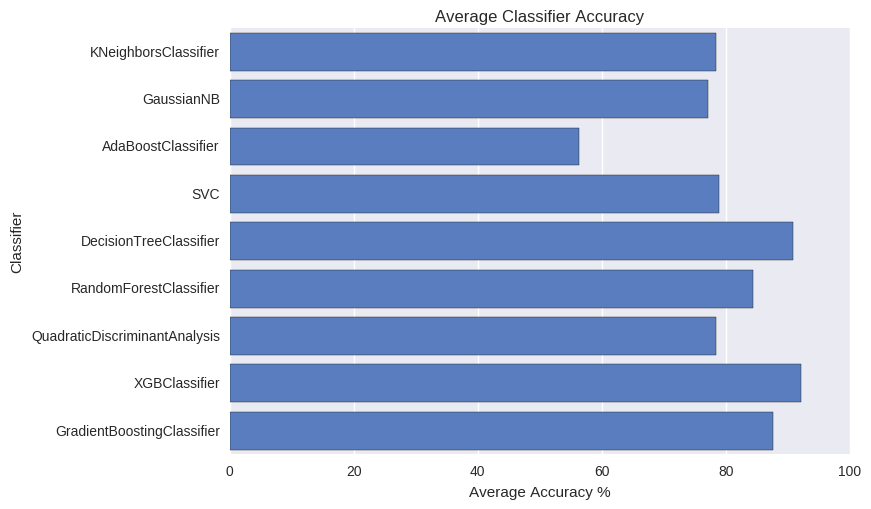

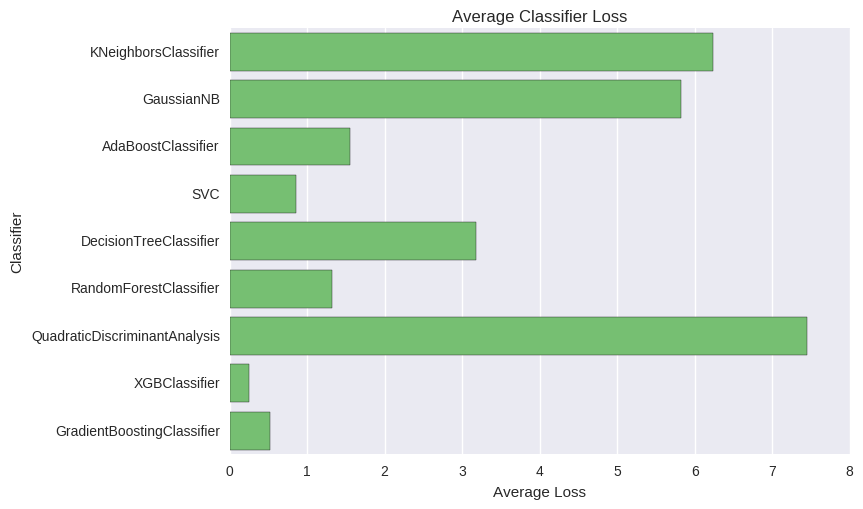

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
from tqdm import tqdm
sns.set_color_codes("muted")

data_frame = pd.read_csv('data/processed_data.csv')

le = LabelEncoder().fit(data_frame.label) 
labels = le.transform(data_frame.label)  
sss = StratifiedShuffleSplit(labels, 10, test_size=0.3, random_state=23)

data_frame.drop('readme', axis=1, inplace=True)
data_frame.drop('description', axis=1, inplace=True)
data_frame.drop('repository', axis=1, inplace=True)
data_frame.drop('owner', axis=1, inplace=True)
data_frame.drop('name', axis=1, inplace=True)
data_frame.drop('label', axis=1, inplace=True)
data_frame.fillna(0, inplace=True)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    #NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    XGBClassifier()]

classifier_accs = {}
classifier_loss = {}
for clf in classifiers:
    classifier_accs[clf.__class__.__name__] = 0
    classifier_loss[clf.__class__.__name__] = 0

for train_index, test_index in tqdm(sss):
    X_train, X_test = data_frame.values[train_index], data_frame.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    for clf in classifiers:
        clf.fit(X_train, y_train)
        name = clf.__class__.__name__
        train_predictions = clf.predict(X_test)
        acc = accuracy_score(y_test, train_predictions)
        classifier_accs[name] += acc

        train_predictions = clf.predict_proba(X_test)
        ll = log_loss(y_test, train_predictions)
        classifier_loss[name] += ll

avg_acc = {k: v / len(sss) for k, v in classifier_accs.iteritems()}
avg_loss = {k: v / len(sss) for k, v in classifier_loss.iteritems()}
avg_df = pd.DataFrame([[name, acc, avg_loss[name]] for name, acc in avg_acc.iteritems()], columns=['Classifier', 'Avg Accuracy', 'Avg Loss'])

sns.barplot(x='Avg Accuracy', y='Classifier', data=avg_df, color="b")
plt.xlabel('Average Accuracy %')
plt.title('Average Classifier Accuracy')
plt.show()

sns.barplot(x='Avg Loss', y='Classifier', data=avg_df, color="g")
plt.xlabel('Average Loss')
plt.title('Average Classifier Loss')
plt.show()

In [173]:
le = LabelEncoder().fit(validation_data.label) 
labels = le.transform(validation_data.label)
print validation_data.label[:5]
print labels[:5]
data_frame = pd.read_csv('data/processed_data.csv')
print data_frame.label[:5]
print le.transform(data_frame.label)

0     HW
1     HW
2    EDU
3    EDU
4    DEV
Name: label, dtype: object
[4 4 3 3 1]
0    DEV
1    DEV
2    DEV
3    DEV
4    DEV
Name: label, dtype: object
[1 1 1 1 1 4 4 4 4 4 3 3 3 3 3 2 2 2 2 2 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 3]


In [174]:
validation_data.drop('readme', axis=1, inplace=True)
validation_data.drop('description', axis=1, inplace=True)
validation_data.drop('repository', axis=1, inplace=True)
validation_data.drop('owner', axis=1, inplace=True)
validation_data.drop('name', axis=1, inplace=True)
y_valid = validation_data.pop("label")
validation_data.fillna(0, inplace=True)

In [175]:
data_frame.drop('readme', axis=1, inplace=True)
data_frame.drop('description', axis=1, inplace=True)
data_frame.drop('repository', axis=1, inplace=True)
data_frame.drop('owner', axis=1, inplace=True)
data_frame.drop('name', axis=1, inplace=True)
data_frame.drop('label', axis=1, inplace=True)
data_frame.fillna(0, inplace=True)

In [177]:
for c in validation_data.columns:
    if c not in data_frame.columns:
        data_frame[c] = 0
for c in data_frame.columns:
    if c not in validation_data.columns:
        validation_data[c] = 0

In [242]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.6, random_state=23)
for train_index, test_index in sss:
    X_train, X_test = data_frame.values[train_index], data_frame.values[test_index]
    y_train, y_test = labels[train_index], labels[test_index]

    clf = XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(validation_data.values)
    print accuracy_score(y_correct, le.inverse_transform(y_pred))

0.516129032258
0.322580645161
0.258064516129
0.290322580645
0.322580645161
0.483870967742
0.354838709677
0.41935483871
0.451612903226
0.322580645161


In [219]:
le.inverse_transform(pd.DataFrame.from_csv("data/processed_data.csv")["label"][:5])

ValueError: y contains new labels: ['DEV']

In [215]:
le.inverse_transform(labels)

array(['HW', 'HW', 'EDU', 'EDU', 'DEV', 'WEB', 'EDU', 'DOCS', 'DOCS',
       'DATA', 'DEV', 'HW', 'DEV', 'DEV', 'HW', 'DEV', 'DOCS', 'DEV',
       'EDU', 'DEV', 'DEV', 'WEB', 'HW', 'DATA', 'DATA', 'WEB', 'DEV',
       'DEV', 'WEB', 'DEV', 'DOCS'], dtype=object)

In [231]:
for i in range(len(repo)):
    print "correct is {}, predicted as {}".format(y_correct[i], le.inverse_transform(y_pred[i]))

correct is HW, predicted as EDU
correct is HW, predicted as DOCS
correct is EDU, predicted as WEB
correct is EDU, predicted as DEV
correct is DEV, predicted as DEV
correct is WEB, predicted as DOCS
correct is EDU, predicted as DATA
correct is DOCS, predicted as WEB
correct is DOCS, predicted as WEB
correct is DATA, predicted as DEV
correct is DEV, predicted as DEV
correct is HW, predicted as DOCS
correct is DEV, predicted as DEV
correct is DEV, predicted as DEV
correct is HW, predicted as DOCS
correct is DEV, predicted as DEV
correct is DOCS, predicted as DEV
correct is DEV, predicted as DEV
correct is EDU, predicted as DEV
correct is DEV, predicted as DEV
correct is DEV, predicted as DEV
correct is WEB, predicted as DEV
correct is HW, predicted as DOCS
correct is DATA, predicted as DEV
correct is DATA, predicted as DEV
correct is WEB, predicted as DEV
correct is DEV, predicted as WEB
correct is DEV, predicted as DEV
correct is WEB, predicted as DOCS
correct is DEV, predicted as DOCS
c

Confusion matrix, without normalization
[[2 0 1 0 0 0]
 [8 1 0 2 0 0]
 [3 1 0 0 0 0]
 [2 0 1 0 1 0]
 [0 4 0 0 1 0]
 [2 1 0 0 1 0]]


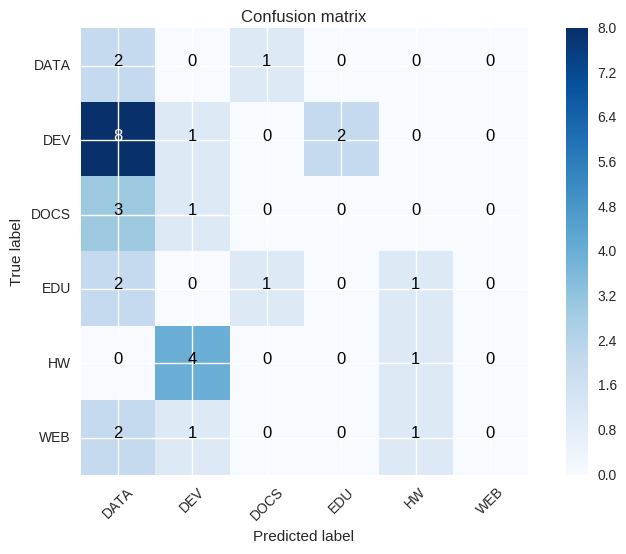

In [230]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')  

cnf_matrix = confusion_matrix(y_correct, y_predict)
plot_confusion_matrix(cnf_matrix, le.classes_, normalize=False)
plt.show()

In [212]:
le.inverse_transform(range(6))

array(['DATA', 'DEV', 'DOCS', 'EDU', 'HW', 'WEB'], dtype=object)

In [162]:
unique_labels

['HW', 'EDU', 'DEV', 'WEB', 'DOCS', 'DATA']

In [224]:
print pd.DataFrame.from_csv("data/validation_data.csv")["label"][:10]
print pd.DataFrame.from_csv("data/processed_data.csv")["label"][:10]
print le.transform(pd.DataFrame.from_csv("data/validation_data.csv")["label"][:10])
print le.transform(pd.DataFrame.from_csv("data/processed_data.csv")["label"][:10])

0      HW
1      HW
2     EDU
3     EDU
4     DEV
5     WEB
6     EDU
7    DOCS
8    DOCS
9    DATA
Name: label, dtype: object
0    DEV
1    DEV
2    DEV
3    DEV
4    DEV
5     HW
6     HW
7     HW
8     HW
9     HW
Name: label, dtype: object
[4 4 3 3 1 5 3 2 2 0]
[1 1 1 1 1 4 4 4 4 4]
